# Ly$\alpha$ Luminosities

In [13]:
from lya_functions import *
import matplotlib.pyplot as plt
from twentyonecmFAST import load_binary_data

plt.rc('font', family='serif')

In [14]:
z = 7.04

In [15]:
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

In [23]:
lya_cube = cube_brightness(halo_mass, halo_pos, z)
smoothed_lya = smooth_cubes(lya_cube, z, 20. * u.cm, 1216. * u.Angstrom)

In [32]:
d_ps, k = dimensional_ps(lya_cube, 200, bins = 14, log_bins = True, dimensionless = True)

In [33]:
f = '../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc'
data_cube = load_binary_data(f)
dc = data_cube.reshape((256,256,256))
smoothed_21 = smooth_cubes(dc, z, 876. * u.m, 21. * u.cm)
smoothed_21 = I_21(smoothed_21 * u.mK, z)

In [34]:
d_ps_21, k = dimensional_ps(smoothed_21, 200, bins = 14, log_bins = True, dimensionless = True)

In [35]:
d_ps_x, k = dimensional_ps(smoothed_lya, 200, bins = 14, log_bins = True, 
                           dimensionless = True, deltax2 = smoothed_21)

In [36]:
ccc = np.load('ccc_7.2.npy')
ks = np.load('ks.npy')

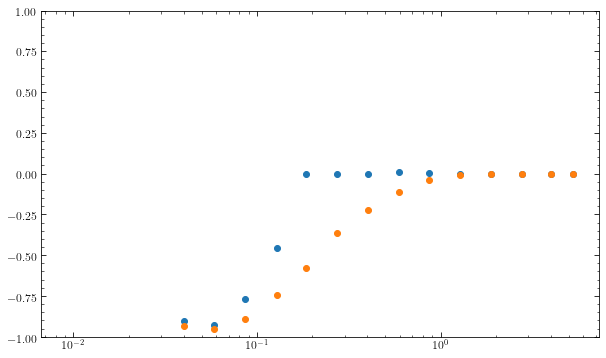

In [37]:
plt.figure(figsize = (10,6))
plt.scatter(k, d_ps_x / np.sqrt(d_ps_21 * d_ps), label = 'Smoothed')
plt.scatter(ks, ccc, label = 'Unsmoothed')
plt.xscale('log')
plt.ylim([-1, 1])
plt.show()